In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

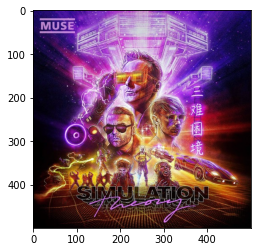

In [3]:
img = cv2.imread('detailed.jpg',  cv2.IMREAD_COLOR)

plt.imshow(img)
plt.show()

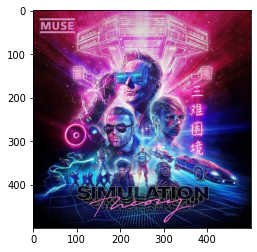

In [51]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # this converts it into RGB

plt.imshow(rgb_img)
plt.show()

In [52]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
kp = fast.detect(rgb_img, None)
br = cv2.BRISK_create();
kp1, des1 = br.compute(rgb_img,  kp)

In [53]:
des1.shape

(11839, 64)

In [54]:
len(kp)

12158

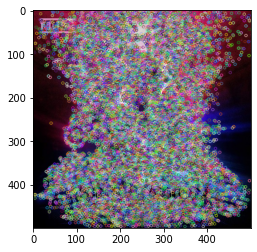

In [55]:
out = rgb_img.copy()
plt.imshow(cv2.drawKeypoints(rgb_img, kp, out))

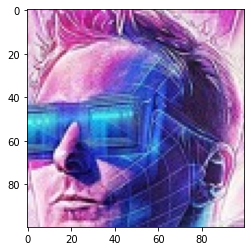

In [56]:
cropped_image = rgb_img[100:200, 200:300]
plt.imshow(cropped_image)
plt.show()

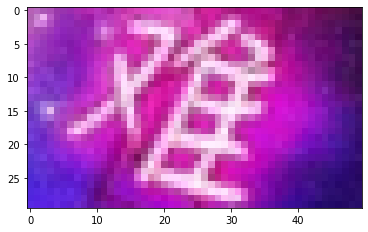

In [57]:
test_image = rgb_img.copy()
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), -25, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_image = test_image[270:300, 350:400]



plt.imshow(test_image)
plt.show()

In [58]:
kp2 = fast.detect(test_image, None)
kp2, des2 = br.compute(test_image,  kp2)

In [59]:
des1.shape

(11839, 64)

In [60]:
br.compute(test_image,  kp2)

([<KeyPoint 000001C76F53AF30>,
  <KeyPoint 000001C76F543A80>,
  <KeyPoint 000001C76F543660>,
  <KeyPoint 000001C76F543840>,
  <KeyPoint 000001C76F5435A0>],
 array([[251, 191,   0,   0,   8,  56, 240, 240, 224, 193,   3,  19, 252,
         240, 194,  19,  15,   0,   0,   8,  96,   0,  65, 240, 248,  29,
           0,  83,  72,   1,   0,  64,  12,   3, 194, 120, 198, 137, 243,
         254, 255, 255, 101,  46, 196,   2,  32, 251,   1,   0,   0,  48,
          28, 237, 255, 175, 249, 254,  31, 142, 255,  77,  29,   0],
        [180,  59, 215,  96, 232, 222,  49,   1,   0,   0,  12, 238, 120,
         227, 140, 243, 127,  24,   0,  32, 107, 255, 247,  30,   0,  99,
         247, 255, 123, 237,  48, 251, 122,   3, 128, 219, 223, 187, 247,
         206, 189, 116,  27,  17,  51, 241, 255, 127, 190, 255, 130, 187,
         236,  95, 234,   8,  88, 135,   2,   0, 114, 132, 205, 207],
        [ 48, 128,  31,   6,   0, 144, 118,   0,   0, 128,  97,  14,  59,
           0,   0, 249, 127, 251, 201,

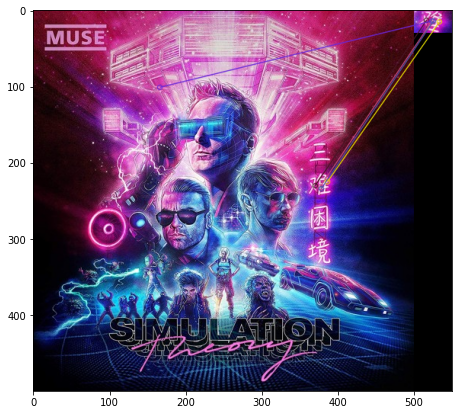

In [61]:
# create BFMatcher object 
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) 
# Match descriptors. 
matches = bf.match(des1, des2) 
# Sort them in the order of their distance. 
matches = sorted(matches, key = lambda x:x.distance) 
# Draw first 10 matches. 
img3 = cv2.drawMatches(rgb_img,kp1,test_image,kp2,matches[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.figure(figsize=(10, 7))
plt.imshow(img3)
plt.show() 

In [62]:
from scipy.spatial.distance import euclidean

euclidean(des1[0], des2[0])

1112.4414591339178

In [63]:
(des1[0] - des2[0]) @ des1[0]

111

In [64]:
def matcher(des1: np.ndarray, des2: np.ndarray, threshold: float, distf) -> list:
    matches = []
    for i in range(len(des1)):
        for j in range(len(des2)):
            dist = distf(des1[i].reshape(1,-1), des2[j].reshape(1,-1))
            if dist < threshold:
                matches.append(cv2.DMatch(_queryIdx=i, _trainIdx=j, _imgIdx=0,_distance=dist))
    
    return matches

matches2 = matcher(des1, des2, 1000, euclidean)

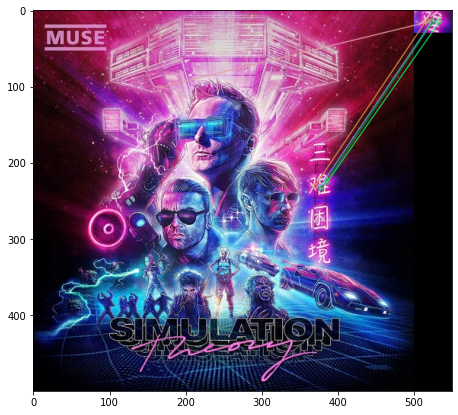

In [65]:
matches2 = sorted(matches2, key = lambda x:x.distance) 
# Draw first 10 matches. 
img3 = cv2.drawMatches(rgb_img,kp1,test_image,kp2,matches[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.figure(figsize=(10, 7))
plt.imshow(img3)
plt.show() 